# XML. Что это?

Аббревиатура **XML** расшифровывается как **eXtensible Markup Language** — расширяемый язык разметки. Он (язык) позволяет описывать документы, используя теги.

Если вы когда-нибудь сталкивались с HTML, языком разметки для создания веб-страниц, то можете заметить, что XML очень похож на него. Однако в отличие от HTML, где теги заранее чётко заданы, в XML мы можем задавать теги сами.

Например, если мы хотим описать меню в ресторане в формате XML-документа, мы можем сделать это так:

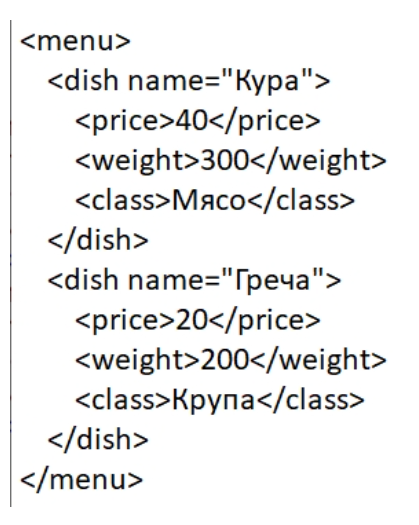

В примере выше довольно жёсткая структура: у нас есть меню  — тег ``<menu>``, где хранятся объекты, то есть конкретные блюда, помеченные тегом ``<dish>``. У каждого из блюд есть параметр name, в котором прописано имя блюда. Можно считать, что ``<dish>`` — класс этого объекта.

Внутри каждого объекта-блюда находится набор значений, которые тоже задаются тегами. Например, внутри тега ``<price>`` находится значение 20, означающее цену данного блюда. Тег ``<price>`` и другие теги внутри можно рассматривать как атрибуты класса dish.

*Файлы XML не всегда имеют жёсткую структуру и не обязаны её иметь, но чаще всего какая-то структура внутри файла будет. Почему? Потому что обычно XML не пишут вручную. Такие файлы генерируются кодом и читаются тоже кодом. Поэтому при наличии понятной структуры обработка файла становится намного проще.*